In [50]:
import pandas as pd
import numpy as np
import datetime as dt
from lifelines import KaplanMeierFitter
from lifelines import NelsonAalenFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [9]:
startup = pd.read_excel("C://플랫폼 SME 연구센터/스타트업 데이터 업데이트/23-11-03_스타트업 데이터.xlsx", sheet_name=2, header=1, index_col=0)
startup

,registration_number,name,estdate,address_city,address_district,address_detail,service,service_details,country,category1,...,fd2_edu_schoolname3,fd2_edu_major3,fd2_career_firmname1,fd2_career_rank1,fd2_career_job1,fd2_career_dur1,fd2_career_firmname2,fd2_career_rank2,fd2_career_job2,fd2_career_dur2
id,,,,,,,,,,,,,,,,,,,,,
1,178-86-00272,가브린트,2015-11-05,제주,제주시,"내도1길 23, 320호",와라페이,QR코드 기반 간편결제 서비스,한국,결제,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,384-81-01454,가이드라이브,2019-05-22,서울,중구,"청계천로 40, 812호",가이드라이브,"가이드/도슨트 매니지먼트 기반의 투어 서비스, 랜선 투어",한국,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,156-81-00883,가치공간,2018-01-01,서울,마포구,"백범로31길 21, 808호",가치공간,백화점 유휴공간 공유 팝업 스토어 플랫폼,한국,리얼타임 커뮤니케이션,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,413-81-06460,갓차모빌라이즈(갓차),2016-08-24,부산,수영구,"광남로 214, 5층",갓차,정기구독형 방문 세차 중개 플랫폼,한국,리얼타임 커뮤니케이션,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,287-87-01121,같다,2018-03-20,서울,성동구,성수2가3동 277-43번지 4층 405비호,빼기,모바일 대형폐기물 수거 플랫폼,한국,리얼타임 커뮤니케이션,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910,821-81-01725,호텔가이드,2019-12-04,서울,노원구,"동일로 1025, 4층",호텔가,단골추가 숙박예약 플랫폼,한국,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3911,752-87-01834,훌템,2020-12-28,경기도,군포시,"군포첨단산업2로22번길 5, 617호",뽀얀닷컴,이동형 매트리스 세탁 서비스,한국,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3912,752-86-01410,휴니버스글로벌,2019-06-12,서울,성북구,"안암로81, 2층",정밀의료 병원정보시스템,클라우드기반 병의원 정보시스템,한국,클라우드,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
startup['est_dt'] = startup['estdate'].dt.year
startup['ed_dt'] = startup['end_dt'].dt.year

In [11]:
startup['event'] = startup['ed_dt'].isnull().apply(lambda x: 0 if x else 1)
startup['cld_dt'] = startup['ed_dt']

In [12]:
startup['cld_dt'] = startup['cld_dt'].fillna(2023)

In [13]:
startup['time'] = startup['cld_dt']-startup['est_dt']

In [71]:
startup_1 = startup.drop(index=[1691, 1709, 3216, 3517, 3727])

In [84]:
sa_df2 = startup_1.loc[:,['name','platform','est_dt','ed_dt','time','event']]

In [85]:
sa_df2_in21y = sa_df2[(sa_df2['est_dt']<2022) & (sa_df2['est_dt']>1999)]

# 폐업 기업수

## 23년 폐업(23.01~23.10)

In [86]:
print(sa_df2_in21y[sa_df2_in21y['ed_dt']==2023]['est_dt'].value_counts().sort_index(ascending=False))
print("총 기업수:",sa_df2_in21y[sa_df2_in21y['ed_dt']==2023]['est_dt'].value_counts().sum())

2021     3
2020     4
2019    17
2018     7
2017    13
2016    11
2015     8
2014     2
2012     1
2011     2
2010     1
Name: est_dt, dtype: int64
총 기업수: 69


## 22년 폐업

In [87]:
print(sa_df2_in21y[sa_df2_in21y['ed_dt']==2022]['est_dt'].value_counts().sort_index(ascending=False))
print("총 기업수:",sa_df2_in21y[sa_df2_in21y['ed_dt']==2022]['est_dt'].value_counts().sum())

2021     5
2020    10
2019     8
2018    12
2017    13
2016    10
2015     7
2014     5
2013     4
2012     3
2010     1
2001     1
2000     1
Name: est_dt, dtype: int64
총 기업수: 80


In [88]:
print(sa_df2_in21y[(sa_df2_in21y['ed_dt']==2022) & (sa_df2_in21y['platform']=='플랫폼')]['est_dt'].value_counts().sort_index(ascending=False))
print("총 기업수:",sa_df2_in21y[(sa_df2_in21y['ed_dt']==2022) & (sa_df2_in21y['platform']=='플랫폼')]['est_dt'].value_counts().sum())

2021    3
2020    5
2019    6
2018    4
2017    3
2016    6
2015    3
2014    3
2013    1
2012    2
2001    1
Name: est_dt, dtype: int64
총 기업수: 37


In [89]:
print(sa_df2_in21y[(sa_df2_in21y['ed_dt']==2022) & (sa_df2_in21y['platform']=='비플랫폼')]['est_dt'].value_counts().sort_index(ascending=False))
print("총 기업수:",sa_df2_in21y[(sa_df2_in21y['ed_dt']==2022) & (sa_df2_in21y['platform']=='비플랫폼')]['est_dt'].value_counts().sum())

2021     2
2020     5
2019     2
2018     8
2017    10
2016     4
2015     4
2014     2
2013     3
2012     1
2010     1
2000     1
Name: est_dt, dtype: int64
총 기업수: 43


## 21년 폐업

In [90]:
print(sa_df2_in21y[sa_df2_in21y['ed_dt']==2021]['est_dt'].value_counts().sort_index(ascending=False))
print("총 기업수:",sa_df2_in21y[sa_df2_in21y['ed_dt']==2021]['est_dt'].value_counts().sum())

2021     1
2020     1
2019     6
2018     4
2017     5
2016    11
2015     3
2014     4
2013     1
2012     2
2011     2
2009     1
Name: est_dt, dtype: int64
총 기업수: 41


In [91]:
print(sa_df2_in21y[(sa_df2_in21y['ed_dt']==2021) & (sa_df2_in21y['platform']=='플랫폼')]['est_dt'].value_counts().sort_index(ascending=False))
print("총 기업수:",sa_df2_in21y[(sa_df2_in21y['ed_dt']==2021) & (sa_df2_in21y['platform']=='플랫폼')]['est_dt'].value_counts().sum())

2019    2
2018    2
2017    3
2016    3
2015    2
2014    2
2011    2
Name: est_dt, dtype: int64
총 기업수: 16


In [92]:
print(sa_df2_in21y[(sa_df2_in21y['ed_dt']==2021) & (sa_df2_in21y['platform']=='비플랫폼')]['est_dt'].value_counts().sort_index(ascending=False))
print("총 기업수:",sa_df2_in21y[(sa_df2_in21y['ed_dt']==2021) & (sa_df2_in21y['platform']=='비플랫폼')]['est_dt'].value_counts().sum())

2021    1
2020    1
2019    4
2018    2
2017    2
2016    8
2015    1
2014    2
2013    1
2012    2
2009    1
Name: est_dt, dtype: int64
총 기업수: 25


# 설립 기업수

## 22년 설립

In [93]:
sa_df2[sa_df2['est_dt']==2022]['est_dt'].value_counts().sort_index(ascending=False)

2022    79
Name: est_dt, dtype: int64

In [94]:
sa_df2[(sa_df2['est_dt']==2022) & (sa_df2['platform']=='플랫폼')]['est_dt'].value_counts().sort_index(ascending=False)

2022    27
Name: est_dt, dtype: int64

In [95]:
sa_df2[(sa_df2['est_dt']==2022) & (sa_df2['platform']=='비플랫폼')]['est_dt'].value_counts().sort_index(ascending=False)

2022    52
Name: est_dt, dtype: int64

## 21년 설립

In [96]:
sa_df2_in21y[sa_df2_in21y['est_dt']==2021]['est_dt'].value_counts().sort_index(ascending=False)

2021    322
Name: est_dt, dtype: int64

In [97]:
sa_df2_in21y[(sa_df2_in21y['est_dt']==2021) & (sa_df2_in21y['platform']=='플랫폼')]['est_dt'].value_counts().sort_index(ascending=False)

2021    116
Name: est_dt, dtype: int64

In [98]:
sa_df2_in21y[(sa_df2_in21y['est_dt']==2021) & (sa_df2_in21y['platform']=='비플랫폼')]['est_dt'].value_counts().sort_index(ascending=False)

2021    206
Name: est_dt, dtype: int64

## 20년 설립

In [99]:
sa_df2_in21y[sa_df2_in21y['est_dt']==2020]['est_dt'].value_counts().sort_index(ascending=False)

2020    466
Name: est_dt, dtype: int64

## 19년 설립

In [100]:
sa_df2_in21y[sa_df2_in21y['est_dt']==2019]['est_dt'].value_counts().sort_index(ascending=False)

2019    541
Name: est_dt, dtype: int64

# 생존분석(카플란-마이어)

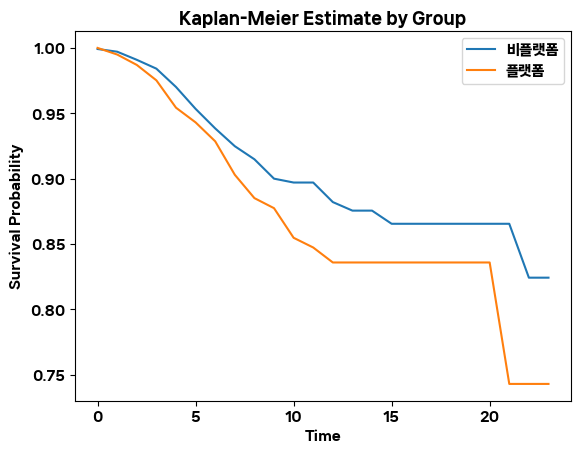

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.30 0.02      5.55

None


In [101]:
kmf = KaplanMeierFitter()

# 데이터를 그룹별로 모델에 적합
for group in sa_df2_in21y['platform'].unique():
    group_data = sa_df2_in21y[sa_df2_in21y['platform'] == group]
    kmf.fit(group_data['time'], event_observed=group_data['event'], label=group)
    ax=plt.subplot()
    kmf.survival_function_.plot(ax=ax)
    #    kmf.plot(label=group)

# 생존 곡선 시각화
plt.title('Kaplan-Meier Estimate by Group')
plt.rc("font", family="NanumSquare Neo OTF Heavy")
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

# 로그랭크 테스트 수행
results = logrank_test(sa_df2_in21y['time'][sa_df2_in21y['platform'] == '플랫폼'], sa_df2_in21y['time'][sa_df2_in21y['platform'] == '비플랫폼'],
                      event_observed_A=sa_df2_in21y['event'][sa_df2_in21y['platform'] == '플랫폼'],
                      event_observed_B=sa_df2_in21y['event'][sa_df2_in21y['platform'] == '비플랫폼'])

print(results.print_summary())

In [102]:
# 데이터를 모델에 적합
kmf.fit(sa_df2_in21y[sa_df2_in21y['platform']=='플랫폼']['time'], event_observed=sa_df2_in21y[sa_df2_in21y['platform']=='플랫폼']['event'])

# 생존비율 구하기
survival_probability = kmf.survival_function_

# 누적 생존비율 구하기
cumulative_survival_probability = kmf.predict(sa_df2_in21y['time'])

# 결과 출력
print("생존비율:")
print(survival_probability)

생존비율:
               플랫폼
timeline          
0.0       1.000000
1.0       0.994946
2.0       0.987004
3.0       0.975207
4.0       0.954283
5.0       0.943043
6.0       0.928580
7.0       0.902989
8.0       0.885133
9.0       0.877436
10.0      0.854793
11.0      0.847360
12.0      0.835909
13.0      0.835909
14.0      0.835909
15.0      0.835909
16.0      0.835909
17.0      0.835909
18.0      0.835909
19.0      0.835909
20.0      0.835909
21.0      0.743030
22.0      0.743030
23.0      0.743030


In [103]:
# 데이터를 모델에 적합
kmf.fit(sa_df2_in21y[sa_df2_in21y['platform']=='비플랫폼']['time'], event_observed=sa_df2_in21y[sa_df2_in21y['platform']=='비플랫폼']['event'])

# 생존비율 구하기
survival_probability = kmf.survival_function_

# 누적 생존비율 구하기
cumulative_survival_probability = kmf.predict(sa_df2_in21y['time'])

# 결과 출력
print("생존비율:")
print(survival_probability)

생존비율:
               플랫폼
timeline          
0.0       0.999173
1.0       0.997106
2.0       0.990905
3.0       0.984137
4.0       0.970137
5.0       0.953389
6.0       0.938443
7.0       0.924843
8.0       0.914837
9.0       0.900013
10.0      0.897052
11.0      0.897052
12.0      0.882101
13.0      0.875567
14.0      0.875567
15.0      0.865503
16.0      0.865503
17.0      0.865503
18.0      0.865503
19.0      0.865503
20.0      0.865503
21.0      0.865503
22.0      0.824289
23.0      0.824289
